In [1]:
import numpy as np 
np.set_printoptions(threshold=10000,suppress=True) 
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

<h1 align=center><font size = 5 color='blue'>Chargement et préparation des données</font></h1>

In [2]:
data=pd.read_csv('./yelp-text-by-stars.csv',sep=';',encoding="ISO-8859-1")
data.head(3)

,Stars,Text
0,1,Boarded my English Mastiff here over New Year'...
1,1,Another case of the Emperor's New Clothes. So...
2,1,Came on Valentine's Day night having pre-bough...


In [3]:
corpus=data.iloc[:,1].values
Y=data.iloc[:,0].values

In [4]:
print('Taille du corpus : {0:d}'.format(len(corpus)))

Taille du corpus : 47371


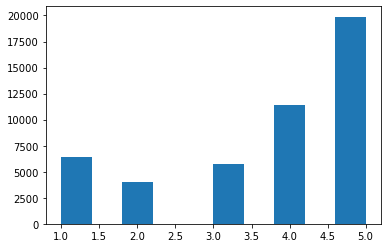

In [5]:
plt.hist(Y)
plt.show()

### Découpage de la base en Apprentissage et test

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
corpus_train,corpus_test,y_train,y_test=train_test_split(corpus,Y,test_size=0.33,shuffle=True,random_state=1)

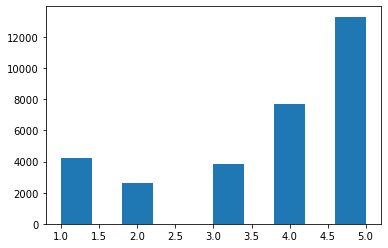

In [8]:
plt.hist(y_train)
plt.show()

<h1 align=center><font size = 5 color='blue'>Création des modèles d'apprentissage</font></h1>

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,accuracy_score,confusion_matrix

In [10]:
algos = {
'RF' : RandomForestRegressor(n_estimators=50,random_state=1,n_jobs=-1),
 'KNN' : KNeighborsRegressor(n_neighbors=5,n_jobs=-1,metric='cosine'),
  'MLP' : MLPRegressor(hidden_layer_sizes=(20,10),max_iter=200,random_state=1,alpha=0.001)
}

def run_models (X_train,Y_train,X_test,Y_test,algos):
    for algo_name in algos:
        model=algos[algo_name]
        model.fit(X_train,Y_train)
        prediction=model.predict(X_test)
        prediction[prediction<1]=1
        prediction[prediction>5]=5
        MAE=mean_absolute_error(Y_test,prediction)
        ACC=accuracy_score(Y_test,np.round(prediction))
        
        print('################## {0} #############'.format(algo_name))
        print('MAE = {0:.3f}, Accuracy ={1:.3f}'.format(MAE,ACC))
        display(confusion_matrix(Y_test,np.round(prediction)))
        print()


In [11]:
corpus_train[0]

'Nice shop, easy to get an appointment.\rLady/girl was professional friendly and actually had a great conversation during the cut.  Style was perfect and service was excellent.'

<h1 align=center><font size = 5 color='blue'>Vectorisation des textes par TF-IDF</font></h1>

In [16]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer

In [17]:
corpus_train[0]

'Nice shop, easy to get an appointment.\rLady/girl was professional friendly and actually had a great conversation during the cut.  Style was perfect and service was excellent.'

In [18]:
CV=CountVectorizer(max_features=1000,stop_words='english')
CV.fit(corpus_train)
corpus_train_CV=CV.transform(corpus_train)
corpus_test_CV=CV.transform(corpus_test)

TFIDF=TfidfTransformer()
TFIDF.fit(corpus_train_CV)
corpus_train_tfidf=TFIDF.transform(corpus_train_CV)
corpus_test_tfidf=TFIDF.transform(corpus_test_CV)



TFIDF=TfidfVectorizer(max_features=1000,stop_words='english')
TFIDF.fit(corpus_train)
corpus_train_tfidf=TFIDF.transform(corpus_train)
corpus_test_tfidf=TFIDF.transform(corpus_test)

In [19]:
corpus_train_tfidf[0].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24917437, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.32033421, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [20]:
TFIDF.vocabulary_

{'nice': 560,
 'shop': 776,
 'easy': 254,
 'appointment': 33,
 'lady': 453,
 'girl': 347,
 'professional': 673,
 'friendly': 330,
 'actually': 17,
 'great': 362,
 'cut': 198,
 'style': 843,
 'perfect': 623,
 'service': 770,
 'excellent': 277,
 'today': 887,
 'time': 882,
 'awesome': 53,
 'experience': 284,
 'definitely': 212,
 'going': 355,
 'addition': 20,
 'bbq': 66,
 'favorite': 300,
 'foods': 319,
 'happy': 379,
 'try': 908,
 'new': 559,
 'spot': 818,
 'area': 35,
 'stand': 821,
 'local': 478,
 'don': 241,
 'let': 463,
 'location': 480,
 'parking': 612,
 'lot': 490,
 'warm': 953,
 'mexican': 524,
 'restaurant': 706,
 'inside': 422,
 'fancy': 296,
 'clean': 149,
 'simple': 787,
 'long': 483,
 'tables': 855,
 'want': 951,
 'enjoy': 265,
 'did': 222,
 'wanted': 952,
 'home': 396,
 'husband': 410,
 'meat': 516,
 'special': 811,
 'comes': 163,
 'sides': 784,
 'priced': 665,
 '11': 3,
 '99': 13,
 'reasonable': 694,
 'quality': 678,
 'food': 318,
 'included': 416,
 'added': 19,
 'corn': 1

In [26]:
TFIDF.get_feature_names()[17]

'actually'

In [21]:
len(TFIDF.get_feature_names())

1000

In [27]:
run_models (corpus_train_tfidf.toarray(),y_train,corpus_test_tfidf.toarray(),y_test,algos)

################## RF #############
MAE = 0.735, Accuracy =0.457


array([[ 587,  841,  472,  221,   23],
       [  78,  405,  514,  337,   44],
       [  34,  213,  722,  822,   96],
       [   8,  104,  612, 2217,  720],
       [   8,  104,  456, 2779, 3216]])


################## KNN #############
MAE = 0.918, Accuracy =0.361


array([[ 271,  632,  707,  440,   94],
       [  62,  242,  507,  496,   71],
       [  28,  153,  600,  931,  175],
       [   9,  105,  756, 2049,  742],
       [  16,  133,  921, 3013, 2480]])


################## MLP #############
MAE = 0.752, Accuracy =0.507


array([[1250,  445,  202,  141,  106],
       [ 371,  361,  302,  224,  120],
       [ 167,  339,  468,  589,  324],
       [ 114,  255,  511, 1311, 1470],
       [ 141,  234,  377, 1270, 4541]])

In [28]:
##Cette partie sert à rajouter des stops_words à la liste des stops_words de Scikit learn

from sklearn.feature_extraction import _stop_words
print(_stop_words.ENGLISH_STOP_WORDS)
new_stop_words=_stop_words.ENGLISH_STOP_WORDS.union(frozenset({'30','40'}))


frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

<h1 align=center><font size = 5 color='blue'>Vectorisation des textes par SVD</font></h1>

In [29]:
from sklearn.decomposition import TruncatedSVD

In [30]:
SVD=TruncatedSVD(n_components=100)
SVD.fit(corpus_train_tfidf)
corpus_train_SVD=SVD.transform(corpus_train_tfidf)
corpus_test_SVD=SVD.transform(corpus_test_tfidf)

In [31]:
corpus_train_SVD.shape

(31738, 100)

In [32]:
run_models (corpus_train_SVD,y_train,corpus_test_SVD,y_test,algos)

################## RF #############
MAE = 0.795, Accuracy =0.408


array([[ 250,  916,  753,  200,   25],
       [  31,  319,  673,  331,   24],
       [   4,  156,  860,  801,   66],
       [   3,   66,  855, 2226,  511],
       [   4,   86,  684, 3072, 2717]])


################## KNN #############
MAE = 0.872, Accuracy =0.388


array([[ 523,  737,  598,  257,   29],
       [ 100,  332,  529,  366,   51],
       [  41,  260,  755,  718,  113],
       [  20,  193,  992, 1859,  597],
       [  43,  232, 1004, 2683, 2601]])


################## MLP #############
MAE = 0.653, Accuracy =0.519


array([[ 843,  769,  358,  144,   30],
       [ 159,  468,  458,  260,   33],
       [  42,  279,  714,  749,  103],
       [  12,  111,  604, 2039,  895],
       [  15,  103,  375, 2020, 4050]])

In [60]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Concept #%d: " % topic_idx
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [62]:
print_top_words(SVD, TFIDF.get_feature_names(), 10)

Concept #0: food good great place service time like just really ve
Concept #1: food good great chicken delicious fresh place restaurant menu atmosphere
Concept #2: great service staff friendly love recommend amazing highly place best
Concept #3: pizza love place best like ve cheese amazing crust try
Concept #4: pizza service great customer crust order ordered cheese car sauce
Concept #5: good pizza really pretty service nice place room food bar
Concept #6: great room bar nice burger hotel night beer got fries
Concept #7: good chicken recommend car friendly highly really work best job
Concept #8: staff friendly room hotel nice vegas restaurant best pizza food
Concept #9: staff friendly love place order helpful nice chicken minutes super
Concept #10: amazing good time burger recommend definitely bar fries best highly
Concept #11: sushi place recommend service rolls roll highly definitely nice came
Concept #12: love service burger customer room hotel coffee und fries location
Concept #13:

<h1 align=center><font size = 5 color='blue'>Vectorisation par Word2Vec entrainé</font></h1>

In [35]:
## get word2vec for each sentences by using average word embeddings
def word2vec_generator(texts,model,vector_size):
    dict_word2vec = {}
    for index, word_list in enumerate(texts):
        arr = np.array([0.0 for i in range(0, vector_size)])
        nb_word=0
        for word in word_list:
            try:
                arr += model[word]
                nb_word=nb_word+1
            except KeyError:
                continue
        if(len(word_list) == 0):
            dict_word2vec[index] = arr
        else:
            dict_word2vec[index] = arr / nb_word
    df_word2vec = pd.DataFrame(dict_word2vec).T
    return df_word2vec

In [37]:
import gensim

In [66]:
type(corpus_train)

numpy.ndarray

In [38]:
corpus_train_tokens = pd.Series(corpus_train).apply(lambda line : gensim.utils.simple_preprocess((line)))
corpus_test_tokens = pd.Series(corpus_test).apply(lambda line : gensim.utils.simple_preprocess((line)))

In [40]:
model_wv_entraine=gensim.models.Word2Vec.load('./Word2vec_entraine.h5')

In [41]:
vector_size=model_wv_entraine.vector_size
corpus_train_wv_entraine=word2vec_generator(corpus_train_tokens,model_wv_entraine.wv,vector_size)
corpus_test_wv_entraine=word2vec_generator(corpus_test_tokens,model_wv_entraine.wv,vector_size)

In [42]:
corpus_train_wv_entraine.iloc[0,:]

0     0.481421
1     0.359746
2     0.285532
3     0.286085
4    -0.526241
        ...   
95   -0.445967
96    0.268851
97   -0.264470
98    0.497927
99    0.266133
Name: 0, Length: 100, dtype: float64

In [76]:
corpus_train[0]

'Nice shop, easy to get an appointment.\rLady/girl was professional friendly and actually had a great conversation during the cut.  Style was perfect and service was excellent.'

In [77]:
corpus_train_tokens[0]

['nice',
 'shop',
 'easy',
 'to',
 'get',
 'an',
 'appointment',
 'lady',
 'girl',
 'was',
 'professional',
 'friendly',
 'and',
 'actually',
 'had',
 'great',
 'conversation',
 'during',
 'the',
 'cut',
 'style',
 'was',
 'perfect',
 'and',
 'service',
 'was',
 'excellent']

In [43]:
run_models (corpus_train_wv_entraine,y_train,corpus_test_wv_entraine,y_test,algos)

################## RF #############
MAE = 0.865, Accuracy =0.357


array([[ 142,  713,  982,  295,   12],
       [  23,  206,  745,  399,    5],
       [   7,  115,  824,  916,   25],
       [   1,   62,  833, 2460,  305],
       [   3,   44,  844, 3721, 1951]])


################## KNN #############
MAE = 0.824, Accuracy =0.425


array([[ 360,  705,  594,  414,   71],
       [  77,  243,  452,  523,   83],
       [  41,  127,  510, 1024,  185],
       [  14,  103,  502, 2130,  912],
       [  19,  115,  508, 2517, 3404]])


################## MLP #############
MAE = 0.634, Accuracy =0.539


array([[ 809,  816,  350,  136,   33],
       [ 168,  491,  453,  233,   33],
       [  43,  297,  691,  771,   85],
       [  21,  163,  508, 2074,  895],
       [  20,  102,  308, 1774, 4359]])

In [ ]:
MAE = 0.653, Accuracy =0.519


<h1 align=center><font size = 5 color='blue'>Vectorisation Word2Vec pre-entrainé de Google</font></h1>

In [44]:
model_wv_google=gensim.models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin'
                                                                , binary=True)

In [45]:
model_wv_google.vector_size

300

In [46]:
len(model_wv_google.index_to_key)

3000000

In [47]:
#corpus_train_tokens[0]
vector_size=model_wv_google.vector_size
corpus_train_wv_google=word2vec_generator(corpus_train_tokens,model_wv_google,vector_size)
corpus_test_wv_google=word2vec_generator(corpus_test_tokens,model_wv_google,vector_size)

In [ ]:
run_models(corpus_train_wv_google,y_train,corpus_test_wv_google,y_test,algos)

################## RF #############
MAE = 0.811, Accuracy =0.381


array([[ 258,  839,  826,  213,    8],
       [  35,  272,  731,  337,    3],
       [  15,  124,  817,  905,   26],
       [   2,   58,  714, 2530,  357],
       [   4,   80,  614, 3793, 2072]])


################## KNN #############
MAE = 0.832, Accuracy =0.394


array([[ 510,  839,  578,  206,   11],
       [  85,  369,  569,  327,   28],
       [  36,  199,  713,  873,   66],
       [  19,  141,  767, 2269,  465],
       [  27,  226,  866, 3147, 2297]])